# Artificial Intelligence, Università di Firenze (2017/18)


---

## Decision trees



In [6]:
from sklearn.datasets import load_iris
import seaborn as sns
import os 
os.environ["PATH"] += os.pathsep + './graphviz/release/bin/'
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

iris = load_iris()
df = sns.load_dataset("iris")

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


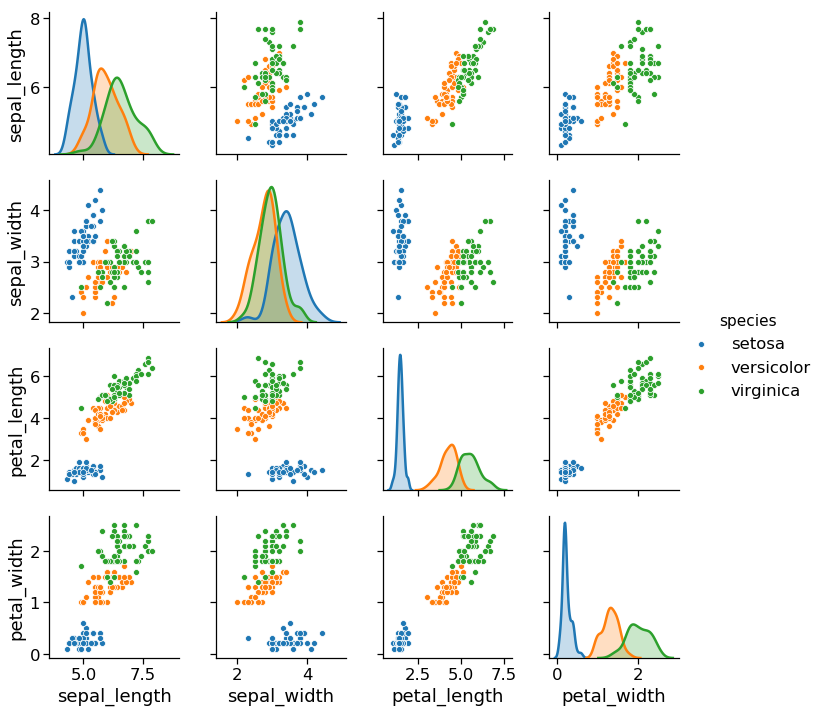

In [8]:
sns.pairplot(df, hue="species")

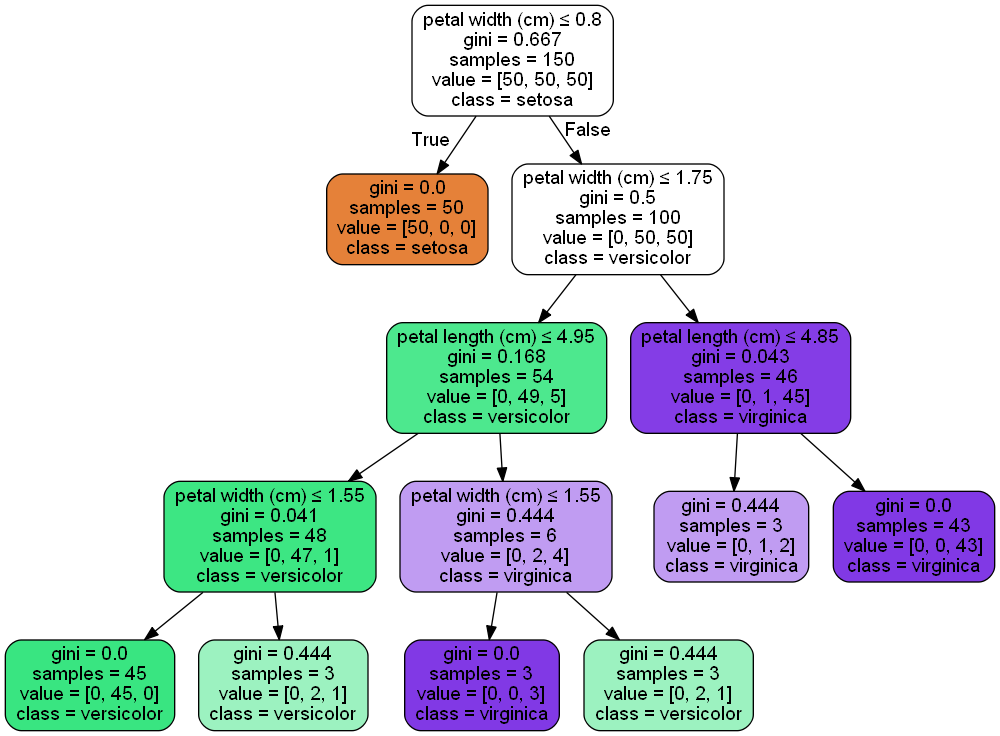

In [9]:
from io import StringIO
from IPython.display import Image
import pydot
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_leaf=3)
clf = clf.fit(iris.data, iris.target)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())